In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0 = pd.read_csv(r'data\bank_marketing_updated_v1.csv')

In [ ]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [8]:
#read the file in inp0 without first two rows as it is of no use.
inp0 = pd.read_csv(r'data\bank_marketing_updated_v1.csv', skiprows=2)
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [9]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [11]:
#print the average age of customers.
print(inp0['age'].mean())

40.93565090394105


In [12]:
#drop the customer id as it is of no use.
inp0.drop('customerid',axis=1,inplace=True)

In [13]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [14]:
# Dividing "jobedu" column into job and education categories.
inp0['job'] = inp0['jobedu'].apply(lambda x: x.split(",")[0])
inp0['education'] = inp0['jobedu'].apply(lambda x: x.split(",")[1])

In [15]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [16]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu',axis=1,inplace=True)

In [18]:
#count the missing values in age column.
print("Total Null Values :",inp0.age.isnull().sum())

Total Null Values : 20


In [20]:
#pring the shape of dataframe inp0
print("Shape of DataFrame :",inp0.shape)

Shape of DataFrame : (45211, 19)


In [23]:
#calculate the percentage of missing values in age column.
print("Percentage of Missing Values :",round(inp0.age.isnull().sum()/inp0.shape[0]*100,2),"%")

Percentage of Missing Values : 0.04 %


In [24]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1 = inp0[~inp0['age'].isnull()].copy()

In [25]:
#convert the age variable data type from float to integer.
inp1['age'] = inp1['age'].astype(int)

In [27]:
# check the null values of age column in inp1
print("Total Null Values in age column :",inp1.age.isnull().sum())

Total Null Values in age column : 0


In [28]:
#count the missing values in month column in inp1.
print("Total Null Values in month column :",inp1.month.isnull().sum())

Total Null Values in month column : 50


In [30]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)*100

month
may, 2017    30.437961
jul, 2017    15.252210
aug, 2017    13.812277
jun, 2017    11.814094
nov, 2017     8.788020
apr, 2017     6.490773
feb, 2017     5.861634
jan, 2017     3.105824
oct, 2017     1.632662
sep, 2017     1.276002
mar, 2017     1.054474
dec, 2017     0.474070
Name: proportion, dtype: float64

In [31]:
#find the mode of month in inp1
mode_month = inp1.month.mode()[0]
print("Mode of month is :",mode_month)

Mode of month is : may, 2017


In [32]:
# fill the missing values with mode value of month in inp1.
inp1['month'].fillna(mode_month,inplace=True)

In [33]:
#let's see the null values in the month column.
print("Total Null Values in month column after imputation :",inp1.month.isnull().sum())

Total Null Values in month column after imputation : 0


In [34]:
#count the missing values in response column in inp1.
print("Total Null Values in response column :",inp1.response.isnull().sum())

Total Null Values in response column : 30


In [35]:
#calculate the percentage of missing values in response column. 
print("Percentage of Missing Values in response column :",round(inp1.response.isnull().sum()/inp1.shape[0]*100,2),"%")

Percentage of Missing Values in response column : 0.07 %


In [36]:
inp1.response.value_counts(normalize=True)

response
no     0.882974
yes    0.117026
Name: proportion, dtype: float64

In [37]:
#drop the records with response missings in inp1.
inp1 = inp1[~inp1['response'].isnull()].copy()

In [38]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [39]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays < 0,'pdays']=np.nan
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [40]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

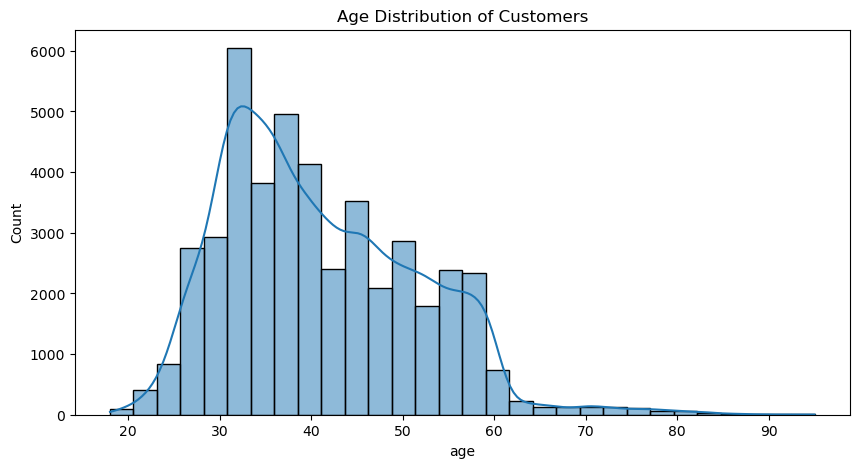

In [42]:
#plot the histogram of age variable.
plt.figure(figsize=(10,5))
sns.histplot(data=inp1, x='age', bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

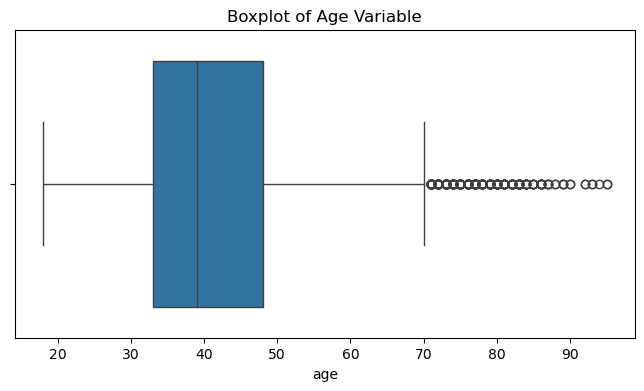

In [43]:
#plot the boxplot of age variable.
plt.figure(figsize=(8,4))
sns.boxplot(x=inp1['age'])
plt.title('Boxplot of Age Variable')
plt.show()

In [44]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

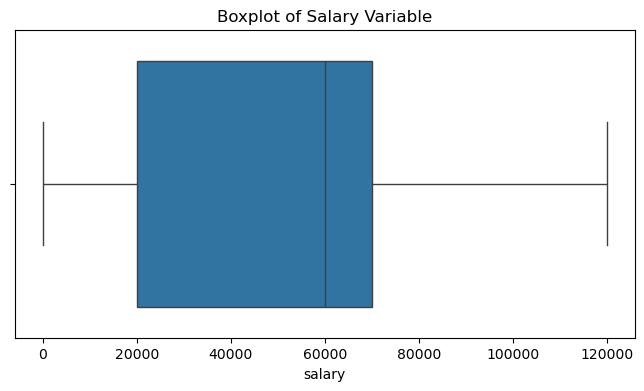

In [45]:
#plot the boxplot of salary variable.
plt.figure(figsize=(8,4))
sns.boxplot(x=inp1['salary'])
plt.title('Boxplot of Salary Variable')
plt.show()

In [46]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

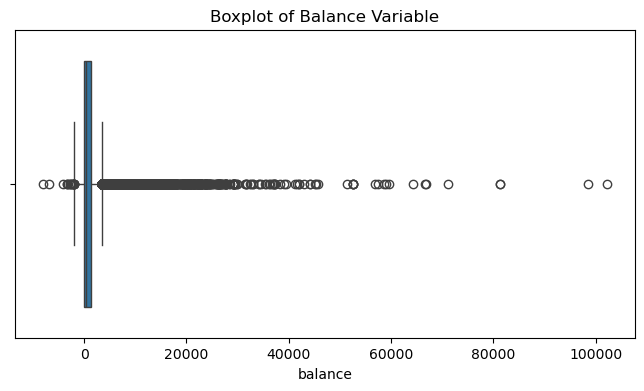

In [48]:
#plot the boxplot of balance variable.
plt.figure(figsize=(8,4))
sns.boxplot(x=inp1['balance'])
plt.title('Boxplot of Balance Variable')
plt.show()

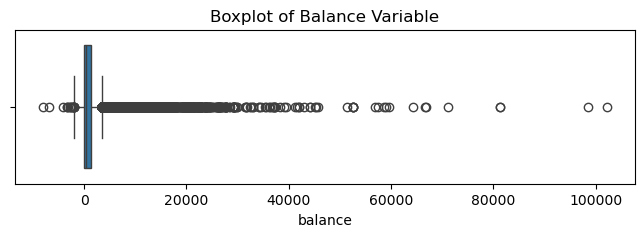

In [50]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=(8,2))
sns.boxplot(x=inp1['balance']) 
plt.title('Boxplot of Balance Variable')
plt.show()

In [51]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [52]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [55]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration = inp1.duration.apply(lambda x: float(x.split(" ")[0])/60 if x.find ("sec") > 0 else float(x.split(" ")[0]))

In [56]:
#describe the duration variable
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [59]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

marital
married     0.601957
single      0.282943
divorced    0.115099
Name: proportion, dtype: float64

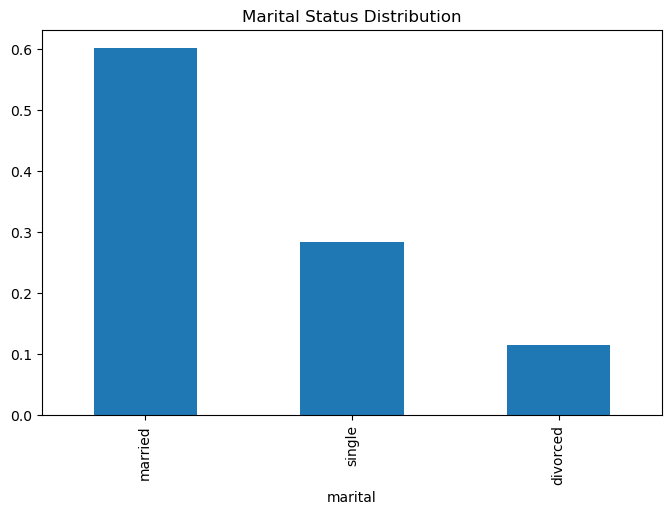

In [60]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot(kind='bar', figsize=(8,5))
plt.title('Marital Status Distribution')
plt.show()

In [61]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

job
blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: proportion, dtype: float64

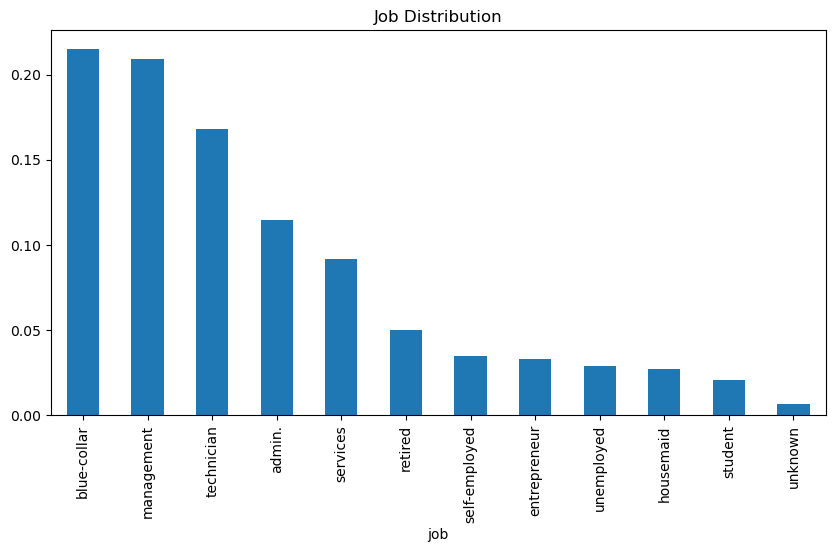

In [62]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot(kind='bar', figsize=(10,5))
plt.title('Job Distribution')
plt.show()

In [63]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

education
secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: proportion, dtype: float64

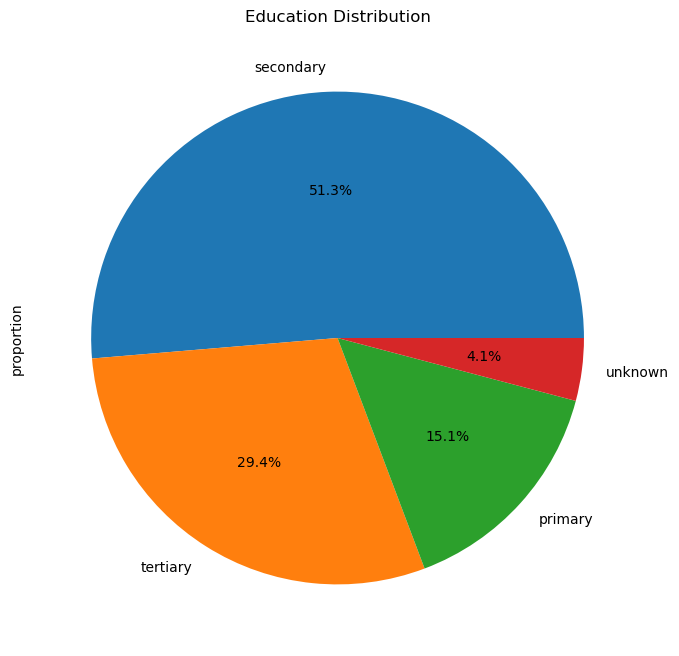

In [64]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Education Distribution')
plt.show()

In [65]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True)

poutcome
unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: proportion, dtype: float64

In [66]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

response
no     0.882974
yes    0.117026
Name: proportion, dtype: float64

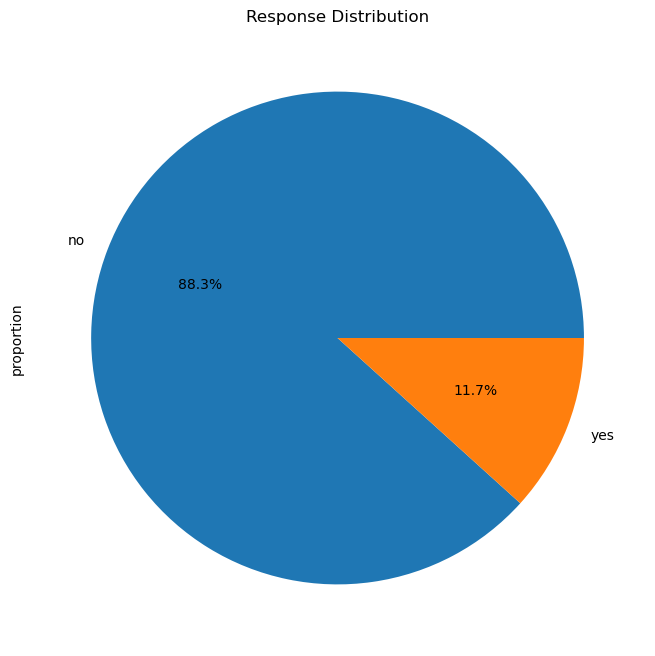

In [67]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Response Distribution')
plt.show()

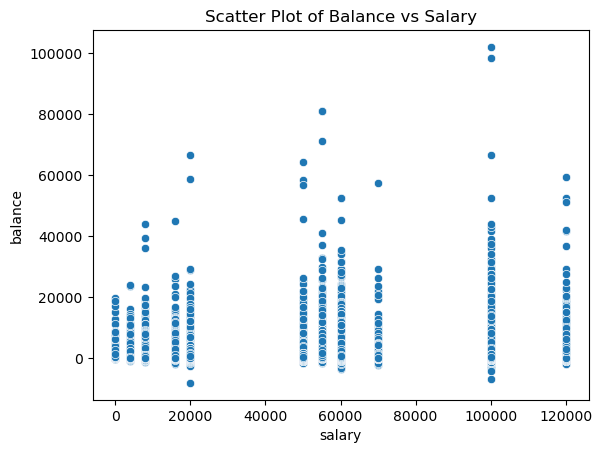

In [68]:
#plot the scatter plot of balance and salary variable in inp1
sns.scatterplot(data=inp1, x='salary', y='balance')
plt.title('Scatter Plot of Balance vs Salary')  
plt.show()

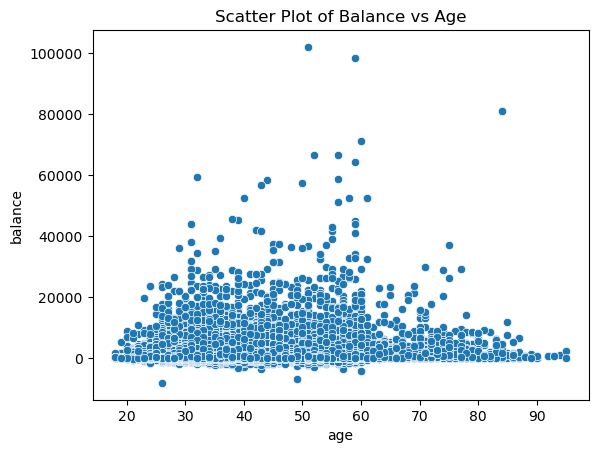

In [69]:
#plot the scatter plot of balance and age variable in inp1
sns.scatterplot(data=inp1, x='age', y='balance')
plt.title('Scatter Plot of Balance vs Age')
plt.show()

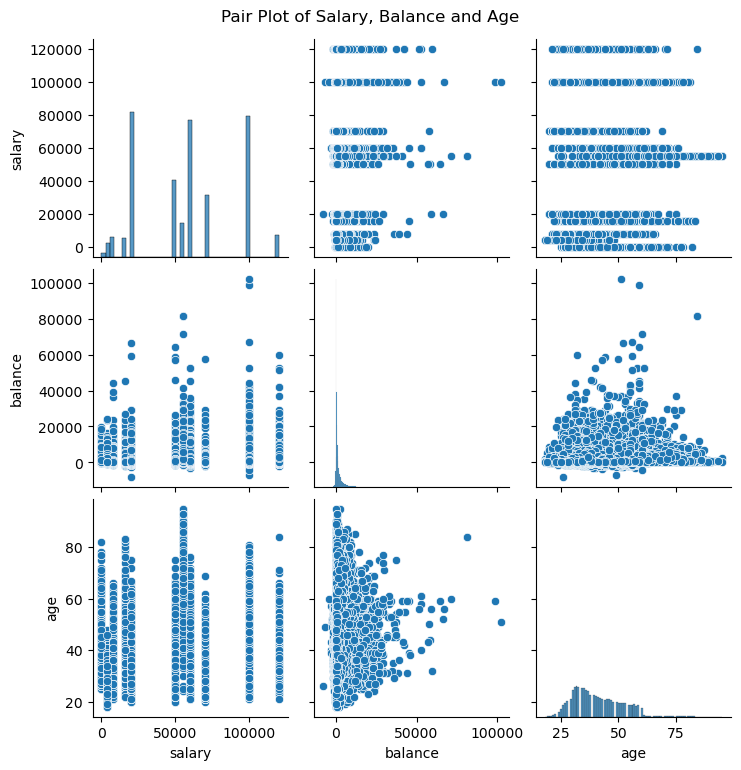

In [70]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(inp1[['salary','balance','age']])
plt.suptitle('Pair Plot of Salary, Balance and Age', y=1.02)
plt.show()

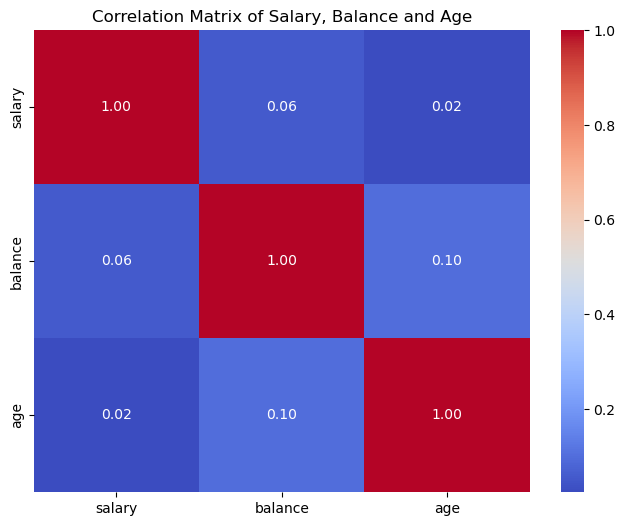

In [71]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
corr_matrix = inp1[['salary','balance','age']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Salary, Balance and Age')
plt.show()

In [72]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [73]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

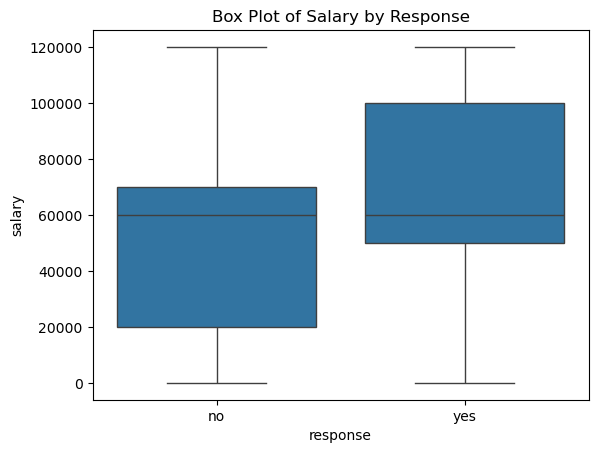

In [74]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(x='response', y='salary', data=inp1)
plt.title('Box Plot of Salary by Response')
plt.show()

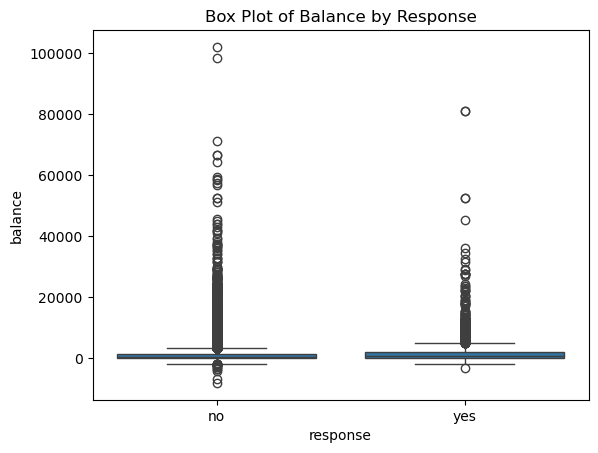

In [75]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(x='response', y='balance', data=inp1)
plt.title('Box Plot of Balance by Response')
plt.show()

In [76]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].mean()


response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [77]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [88]:
#function to find the 75th percentile.
def p75(x):
    return x.quantile(x,0.75)

In [111]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby('response')['balance'].agg('mean','median',p75)

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

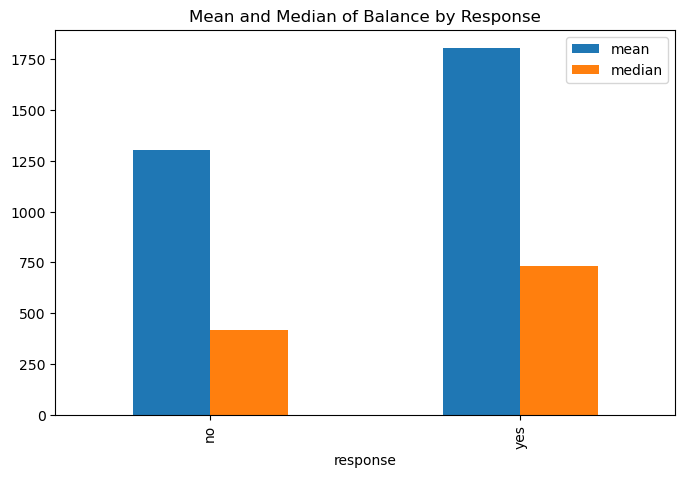

In [92]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby('response')['balance'].agg(['mean','median']).plot(kind='bar', figsize=(8,5))
plt.title('Mean and Median of Balance by Response')
plt.show()

In [93]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [94]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

In [95]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

In [ ]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag'] = inp1['response'].map({'yes':1, 'no':0})

In [97]:
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

In [98]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

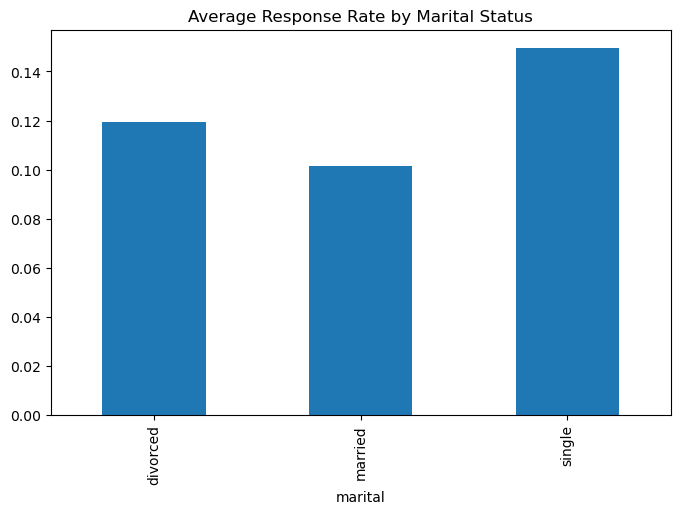

In [99]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby('marital')['response_flag'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average Response Rate by Marital Status')
plt.show()

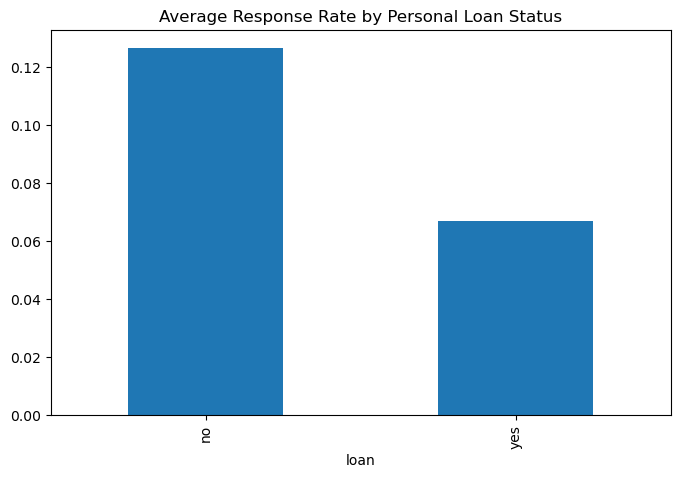

In [101]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby('loan')['response_flag'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average Response Rate by Personal Loan Status')
plt.show()

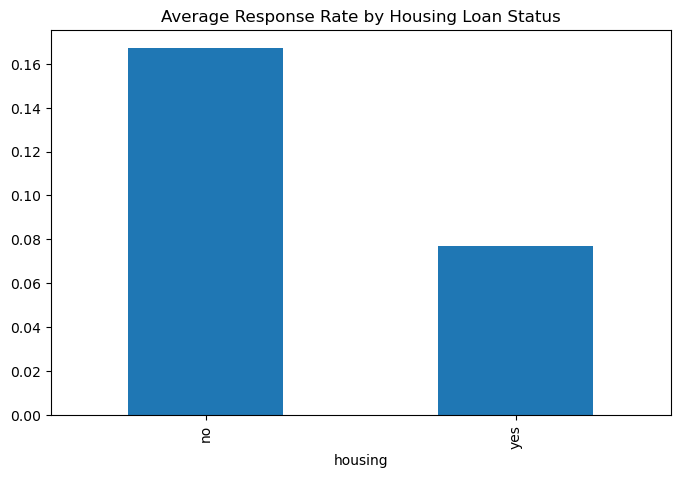

In [102]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby('housing')['response_flag'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average Response Rate by Housing Loan Status')
plt.show()

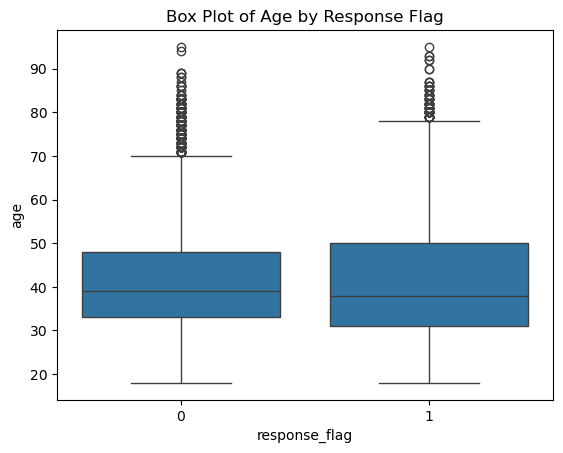

In [103]:
#plot the boxplot of age with response_flag
sns.boxplot(x='response_flag', y='age', data=inp1)
plt.title('Box Plot of Age by Response Flag')
plt.show()

In [104]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1['age_group'] = pd.cut(inp1['age'], bins=[0,30,40,50,60,100], labels=['<30','30-40','40-50','50-60','60+'])

Text(0, 0.5, 'Percentage of Customers')

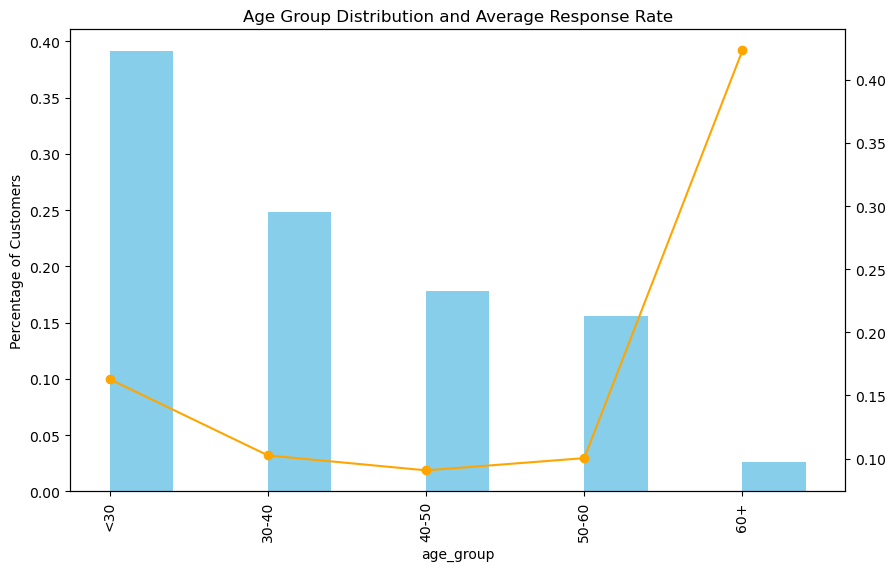

In [105]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
age_group_response = inp1.groupby('age_group')['response_flag'].mean()
age_group_counts = inp1['age_group'].value_counts(normalize=True)
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
age_group_counts.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4)
age_group_response.plot(kind='line', color='orange', marker='o', ax=ax2)
plt.title('Age Group Distribution and Average Response Rate')
ax1.set_ylabel('Percentage of Customers')


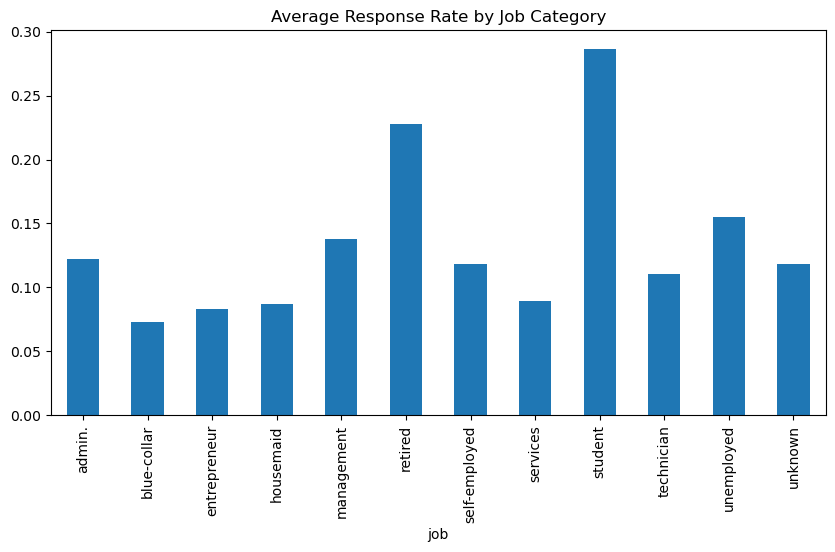

In [106]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby('job')['response_flag'].mean().plot(kind='bar', figsize=(10,5))
plt.title('Average Response Rate by Job Category')
plt.show()

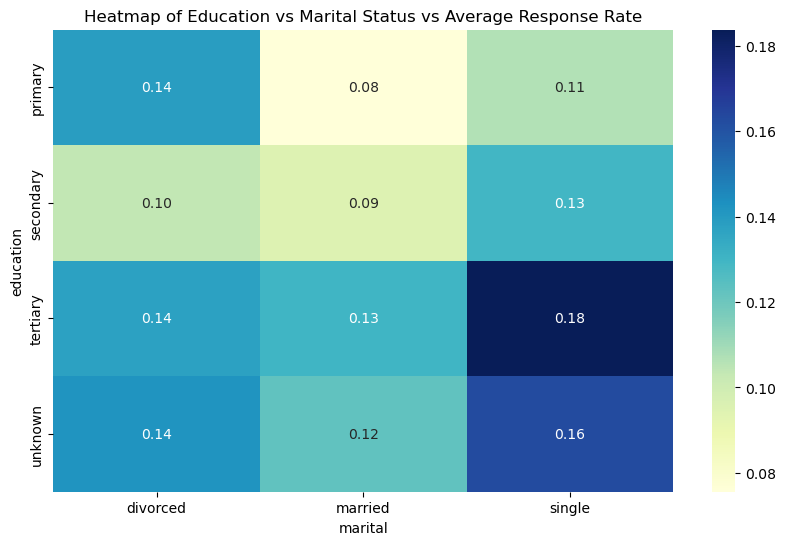

In [107]:
#create heat map of education vs marital vs response_flag
education_marital_response = inp1.pivot_table(index='education', columns='marital', values='response_flag', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(education_marital_response, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Education vs Marital Status vs Average Response Rate')
plt.show()

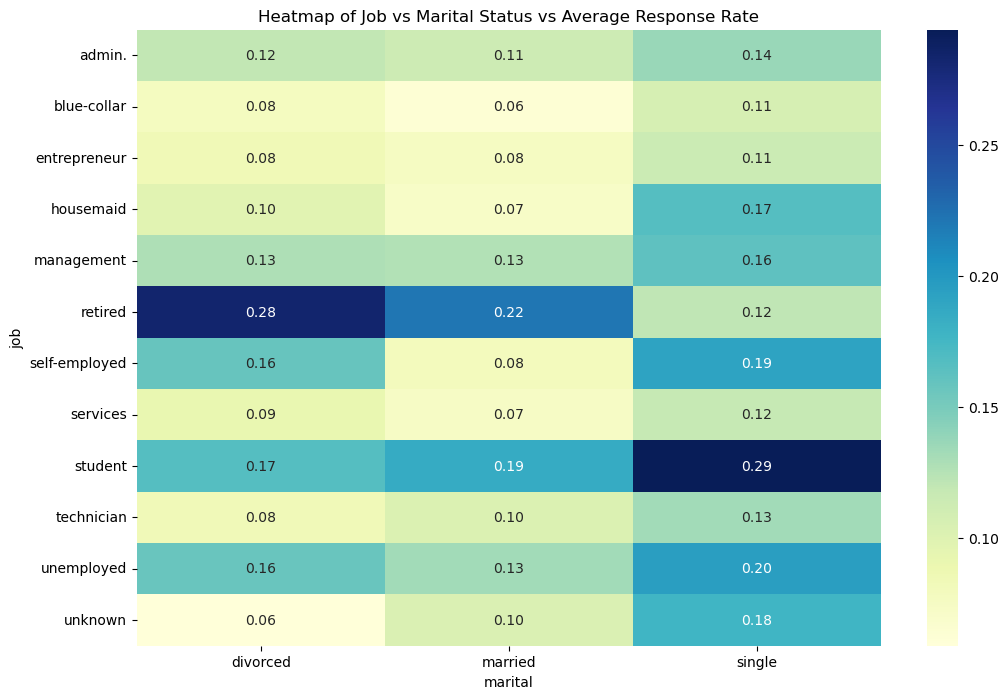

In [110]:
#create the heat map of Job vs marital vs response_flag.
job_marital_response = inp1.pivot_table(index='job', columns='marital', values='response_flag', aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(job_marital_response, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Job vs Marital Status vs Average Response Rate')
plt.show()

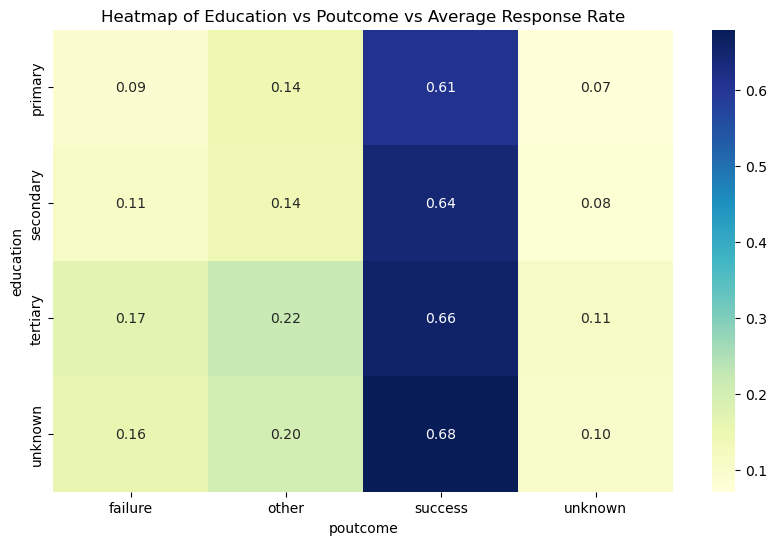

In [109]:
#create the heat map of education vs poutcome vs response_flag.
education_poutcome_response = inp1.pivot_table(index='education', columns='poutcome', values='response_flag', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(education_poutcome_response, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Education vs Poutcome vs Average Response Rate')
plt.show()

## Key Insights
- Majority users belong to admin & blue-collar jobs
- Age group 30–45 is dominant
- Target variable is imbalanced
- Certain features strongly influence outcome
